In [14]:
from sklearn import datasets
import numpy as np   
import math
import scipy
import matplotlib as mt
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

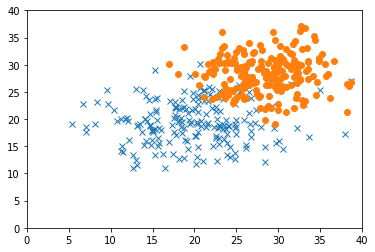

In [2]:
mean1 = 20
sd = 4
var = sd**2

mu1 = [mean1, mean1]
mu2 = [mean1 + sd*2, mean1 + sd*2]
sigma1 = [[var*2, 0], [0, var]]
sigma2 = [[var, 0], [0, var]]
size = 200
x1 = np.random.multivariate_normal(mu1, sigma1, size).T
x2 = np.random.multivariate_normal(mu2, sigma2, size).T
plt.plot(x1[0], x1[1], 'x')
plt.plot(x2[0], x2[1], 'o')
plt.axis([0, 40, 0, 40])
plt.show()

In [17]:
def fisherRatio(dA, dB):
    dA_mean = np.mean(dA)
    dA_var = np.var(dA)
    dB_mean = np.mean(dB)
    dB_var = np.var(dB)
    return ((dA_mean - dB_mean)**2/(dA_var + dB_var))

#Means
meanA = np.array([np.mean(x1[0]), np.mean(x1[1])])
meanB = np.array([np.mean(x2[0]), np.mean(x2[1])])
mean_distance = (meanA + meanB)/2
meanBetweenA = meanA - mean_distance
meanBetweenB = meanB - mean_distance
#Sb
A_Sb = np.dot(meanBetweenA[np.newaxis].T, meanBetweenA[np.newaxis])
B_Sb = np.dot(meanBetweenB[np.newaxis].T, meanBetweenB[np.newaxis])
distance_Sb = A_Sb + B_Sb
#Sw 
A_scatter = np.zeros((2,2))
B_scatter = np.zeros((2,2))
for i in range(0, size):
    rowA = np.array([x1[0][i], x1[1][i]])
    rowA.reshape(2,1)
    meanA.reshape(2,1)
    varA = (rowA-meanA)
    A_scatter += np.dot(varA[np.newaxis].T, varA[np.newaxis])
    rowB = np.array([x2[0][i], x2[1][i]])
    rowB.reshape(2,1)
    meanB.reshape(2,1)
    varB = (rowB-meanB)
    B_scatter += np.dot(varB[np.newaxis].T, varB[np.newaxis])
    distance_Sw = A_scatter + B_scatter
    
eigenValDist,eigenVectDist = np.linalg.eig(np.dot(np.linalg.inv(distance_Sw), distance_Sb)) 
eigenPairDist = [(np.abs(eigenValDist[i]), eigenVectDist[:, i]) for i in range(len(eigenValDist))]
eigenPairDist = sorted(eigenPairDist, key=lambda k: k[0], reverse=True)
optimalW = eigenPairDist[0][1].reshape(2,1)

y1 = np.dot(x1.T, optimalW.real)
y2 = np.dot(x2.T, optimalW.real)

#plt.plot(x1[0], x1[1], 'x')
#plt.plot(x2[0], x2[1], 'o')

mx = 1
if(optimalW[1] > 0):
    mx = (optimalW[0]/optimalW[1])
my= 1
print(optimalW.real)
print(fisherRatio(y1,y2))
if(mx > 1):
    my = 1/mx
    mx= 1

length = 2





[[-0.44254422]
 [-0.89674669]]
3.977722050981762


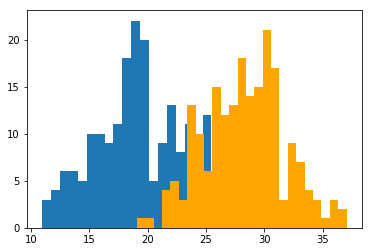

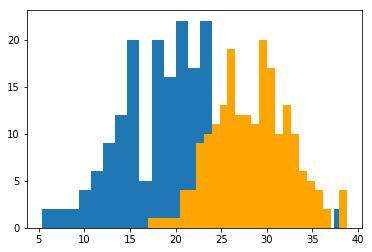

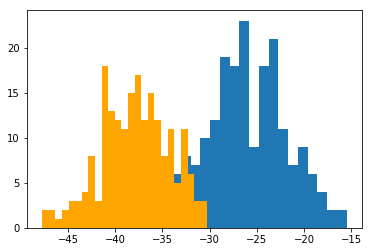

In [5]:

plt.hist(x1[1], 25)
plt.hist(x2[1], 25, color="orange")
plt.show()
plt.hist(x1[0], 25)
plt.hist(x2[0], 25, color="orange")
plt.show()
plt.hist(y1, 25)
plt.hist(y2, 25, color="orange")
#plt.plot(x2[0], x2[1], "o")
plt.show()

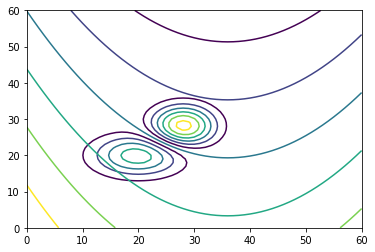

In [9]:
probMesh= [np.linspace(0,60,61), np.linspace(0,60,61)]
x, y = np.meshgrid(probMesh[0], probMesh[1])
#x, y = np.meshgrid(x1[0], x1[1])
mu = [mean1, mean1]
sigma = np.matrix([[var, 0], [0, var]])
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z1 = scipy.stats.multivariate_normal.pdf(pos, mu1, sigma1)
plt.axis([0, 60, 0, 60])


mu = [mean1 + var*2, mean1 + var*2]
sigma = np.matrix([[var, 0], [0, var]])
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
z2 = scipy.stats.multivariate_normal.pdf(pos, mu2, sigma2)
z3 = np.abs(np.subtract(z1, z2))
    
def pdf(x1, x2, mu, sigma):
    pos[:, :, 0] = x1; pos[:, :, 1] = x2
    return scipy.stats.multivariate_normal.pdf(pos, mu, sigma)[0,0]

def probX(x1, x2):
    pA = pdf(x1, x2, mu1, sigma1)
    pB = pdf(x1, x2, mu2, sigma2)
    return (pA + pB - (pA*pB))

def bayes(pClass, pX, xGivenClass):
    return (xGivenClass*pClass)/pX

def logOdd(x1, x2):
    p1 = bayes(0.5, probX(x1, x2), pdf(x1, x2, mu1, sigma1))
    p2 = bayes(0.5, probX(x1, x2), pdf(x1, x2, mu2, sigma2))
    return (np.log(p1) + np.log(0.5)) - (np.log(p2) + np.log(0.5))

z4 = np.zeros([61,61])

index = 0
        
for i in range(0, 61):
    for z in range(0, 61):
        z4[i][z] = logOdd(x[i][z], y[i][z])
        

plt.contour(x,y,z3)
plt.contour(x,y,z4)
plt.show()


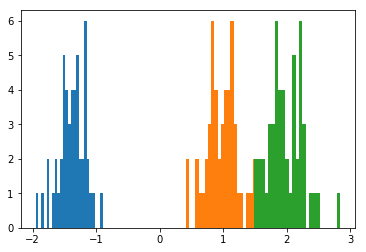

In [13]:
iris = datasets.load_iris()
a = iris.data[0:50]
b = iris.data[50:100]
c = iris.data[100:150]

#Means
meanA = np.array([np.mean(a[:, 0]), np.mean(a[:, 1]), np.mean(a[:, 2]), np.mean(a[:, 3])])
meanB = np.array([np.mean(b[:, 0]), np.mean(b[:, 1]), np.mean(b[:, 2]), np.mean(b[:, 3])])
meanC = np.array([np.mean(c[:, 0]), np.mean(c[:, 1]), np.mean(c[:, 2]), np.mean(c[:, 3])])

mean_distance = (meanA + meanB + meanC)/3
meanBetweenA = meanA - mean_distance
meanBetweenB = meanB - mean_distance
meanBetweenC = meanC - mean_distance

#Sb
a_Sb = np.dot(meanBetweenA[np.newaxis].T, meanBetweenA[np.newaxis])
b_Sb = np.dot(meanBetweenB[np.newaxis].T, meanBetweenB[np.newaxis])
c_Sb = np.dot(meanBetweenC[np.newaxis].T, meanBetweenC[np.newaxis])
distance_Sb = a_Sb + b_Sb + c_Sb
#Sw 
A_scatter = np.zeros((4,4))
B_scatter = np.zeros((4,4))
C_scatter = np.zeros((4,4))
for i in range(0, 50):
    #a
    rowA = np.array([a[i, 0], a[i, 1], a[i, 2], a[i, 3]])
    rowA.reshape(4,1)
    meanA.reshape(4,1)
    varA = (rowA-meanA)
    A_scatter += np.dot(varA[np.newaxis].T, varA[np.newaxis])
    #b
    rowB = np.array([b[i, 0], b[i, 1], b[i, 2], b[i, 3]])
    rowB.reshape(4,1)
    meanB.reshape(4,1)
    varB = (rowB-meanB)
    B_scatter += np.dot(varB[np.newaxis].T, varB[np.newaxis])
    #c
    rowC = np.array([c[i, 0], c[i, 1], c[i, 2], c[i, 3]])
    rowC.reshape(4,1)
    meanC.reshape(4,1)
    varC = (rowC-meanC)
    C_scatter += np.dot(varC[np.newaxis].T, varC[np.newaxis])
    distance_Sw = A_scatter + B_scatter + C_scatter
    
eigenValDist,eigenVectDist = np.linalg.eig(np.dot(np.linalg.inv(distance_Sw), distance_Sb)) 
eigenPairDist = [(np.abs(eigenValDist[i]), eigenVectDist[:, i]) for i in range(len(eigenValDist))]
eigenPairDist = sorted(eigenPairDist, key=lambda k: k[0], reverse=True)
optimalW = eigenPairDist[0][1].reshape(4,1)
#optimalW = np.hstack((eigenPairDist[0][1].reshape(4,1), eigenPairDist[1][1].reshape(4,1)))

#print([eigenPairDist[i][0] for i in range(len(eigenPairDist))])


oA = np.dot(a, optimalW)
oB = np.dot(b, optimalW)
oC = np.dot(c, optimalW)

#oC = c*optimalW.T


plt.hist(oA, 25)
plt.hist(oB, 25)
plt.hist(oC, 25)
plt.show()
